# Digit Recognition - ML 101 with Examples

#### Step 1: Import Packages

In [3]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.neural_network import MLPClassifier
from random import randint


#### Step 2: Pull in Data

This dataset is one of the example datasets that sklearn offers.

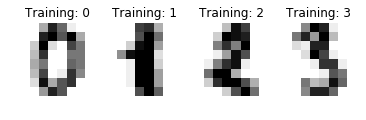

In [4]:
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
plt.show()

#### Step 3: Construct Training and Test Sets

Separate data into training and test sets - very important!

In [7]:
m = len(digits.images)
X = digits.images.reshape((m, -1))
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
m_test = X_test.shape[0]

print('Training set examples: ' + str(X_train.shape[0]))
print('Test set examples: ' + str(X_test.shape[0]))


Training set examples: 1347
Test set examples: 450


&nbsp;
# Ok - let's learn!
&nbsp;

#### Algo 1: Logistic Regression

In [8]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

predictions_train = lr.predict(X_train)

print("Accuracy of Logistic Regression model on Training Set: " + str(accuracy_score(y_train, predictions_train)))
print("Accuracy of Logistic Regression model on Test Set: " + str(accuracy_score(y_test, predictions)))
print()
print()
print(classification_report(y_test, predictions))



Accuracy of Logistic Regression model on Training Set: 0.995545657016
Accuracy of Logistic Regression model on Test Set: 0.96


             precision    recall  f1-score   support

          0       1.00      0.98      0.99        45
          1       0.89      0.93      0.91        44
          2       1.00      1.00      1.00        40
          3       0.98      0.96      0.97        49
          4       0.98      0.96      0.97        55
          5       1.00      0.93      0.96        41
          6       0.95      0.98      0.96        42
          7       1.00      0.98      0.99        52
          8       0.88      0.90      0.89        40
          9       0.91      0.98      0.94        42

avg / total       0.96      0.96      0.96       450



#### Algo 2: Neural Network

In [9]:
mlp = MLPClassifier(hidden_layer_sizes = (30, 30), max_iter = 500)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

predictions_train = mlp.predict(X_train)

print("Accuracy of Neural Network on Training Set: " + str(accuracy_score(y_train, predictions_train)))
print("Accuracy of Neural Network on Test Set: " + str(accuracy_score(y_test, predictions)))
print()
print()
print(classification_report(y_test, predictions))


Accuracy of Neural Network on Training Set: 1.0
Accuracy of Neural Network on Test Set: 0.982222222222


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.94      1.00      0.97        44
          2       1.00      1.00      1.00        40
          3       0.98      1.00      0.99        49
          4       1.00      1.00      1.00        55
          5       0.97      0.90      0.94        41
          6       1.00      1.00      1.00        42
          7       0.98      1.00      0.99        52
          8       1.00      0.93      0.96        40
          9       0.95      0.98      0.96        42

avg / total       0.98      0.98      0.98       450



&nbsp;
### Let's look at some of our predictions

Predicted: 4
Actual: 4


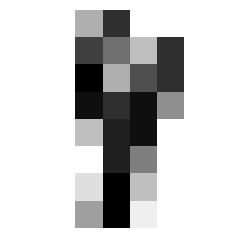

Predicted: 5
Actual: 5


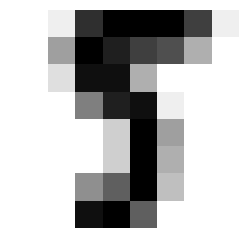

Predicted: 6
Actual: 6


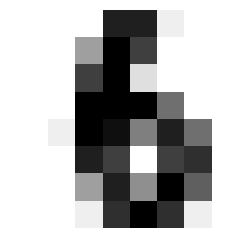

Predicted: 2
Actual: 2


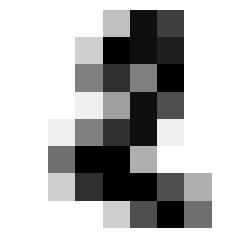

Predicted: 3
Actual: 3


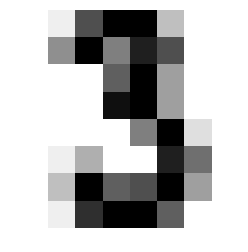

In [10]:
for i in range(5):
    randIndex = randint(0, m_test - 1)
    image = X_test[randIndex].reshape((8, 8))
    label = y_test[randIndex]
    plt.subplots()
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

    print("Predicted: " + str(predictions[randIndex]))
    print("Actual: " + str(label))
    
    plt.show()